# Tutorial: Linear Regression and Classification
### Reza Moravej


# Linear Regression

In [3]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint

# Setting up random generator
Reproducibility is important when we want to present our works. It is really hard to reproduce results, but we can at least try minimizing randomness by fixing seeds!

In [15]:
# Set seed for reproducibility.
seed = 0
np.random.seed(0)

# This cell should always output the same value!
print("Test random seed: {}".format(np.random.uniform()))

Test random seed: 0.5488135039273248


# 1D Linear Regression
## Generate Training Data
We define the source of training data.  
Realistically, we will not have usually access to real data distribution.  Rather, our job is to learn such a model from training data.

We model the source as a random variable since there is measurement error while observing the data!  
**NOTE**: A good practice is to always visualize our data first! This gives us knowledge about what to expect when our trained model does not perform as wanted.

In [16]:
def generate_data(x, w=np.array([[3], [2]]), noise_mean=0, noise_variance=1):
    """ This the ground truth distribution (linear function) used for generating training set (maybe test set).
    Args:
    - x (ndarray (Shape: (N, 1))): A N-column vector corresponding to the inputs.
    - w (ndarray (Shape: (2, 1))): A 2-column vector corresponding to the parameters of the linear function.
    - noise_mean (float): The mean of a Guassian distribution describing measurement noise.
    - noise_variance (float): The variance of a Guassian distribution describing measurement noise.
    
    Output:
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    """
    num_samples = x.shape[0]
    
    # Generate noise
    noise = np.random.normal(loc=noise_mean, scale=noise_variance, size=x.shape)
    
    # Pad 1's for the bias term
    x = np.hstack((np.ones((num_samples, 1)), x))
    # Compute outputs y
    y = np.matmul(x, w) + noise
    
    return y


[(0, 3.7415917408091612),
 (1, 6.552913721912816),
 (2, 4.731671798819626),
 (3, 10.333545381621896),
 (4, 10.157275946170714),
 (5, 14.969924447869895),
 (6, 16.266118529857778),
 (7, 16.49412346023949),
 (8, 21.545200778471052),
 (9, 22.080811913055445)]


<IPython.core.display.Javascript object>


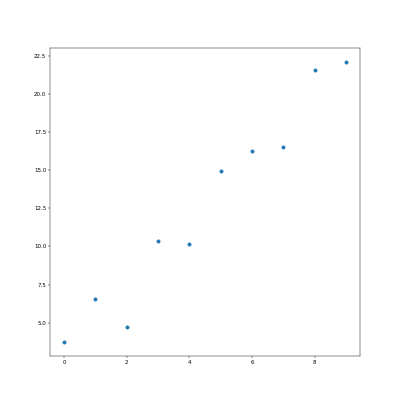

In [17]:
# Let's generate some training data and visual it
true_w = np.array([[3], [2]])
noise_mean = 0
noise_variance = 1

# Generate training data
x = np.expand_dims(np.arange(10), axis=1)
y = generate_data(x=x,
                w=true_w,
                noise_mean=noise_mean,
                noise_variance=noise_variance)

# Visualize the dataset
pprint([(input.item(), output.item()) for input, output in zip(x, y)])


fig1 = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.show()

## Learn the optimal parameters given training data
We now train our linear model based on the training data generated previously.  

In [18]:
def find_optimal_parameters(x, y):
    """ Compute closed form solution for linear regression!
    Optimal weight w* in linear regression is given by w* = (X^T X)^(-1) X^T Y
    
    Args:
    - x (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs.
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    
    Output:
    - w (ndarray (Shape: (D, 1))): A D-column vector corresponding to the bias and weights of the linear model.
    """
    # Pad 1's for the bias term, Why?
    x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Note that we could use pseudoinverse here instead: np.linalg.pinv
    # @ is alias for matmul
    p1 = np.linalg.inv(x.T @ x) # (X^T X) inverse
    p2 = x.T @ y # X^T Y
    w = p1 @ p2
    return w

w = find_optimal_parameters(x, y)
print(w)


[[3.10309185]
 [2.12982798]]


<IPython.core.display.Javascript object>


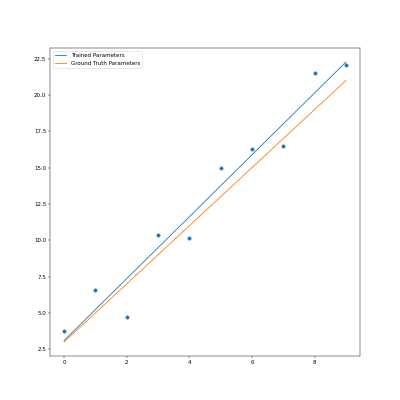

In [19]:
def visualize_2d(x, observed_y, trained_w, true_w):
    """ This visualize the 2D curves """
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x, observed_y)
    
    pad_x = np.hstack((np.ones((x.shape[0], 1)), x))
    plt.plot(x, pad_x @ trained_w, label="Trained Parameters")
    plt.plot(x, pad_x @ true_w, label="Ground Truth Parameters")
    plt.legend()
    plt.show()

visualize_2d(x, y, w, true_w)

We can see that the trained parameters are not the same as the ground truth parameters!  
Why is that?

# 2D Linear Regression
We can modify `ground_truth_distribution` and generalize to multi-dimensional case.  
For the example below, we will try the 2D case since we can still visualize things!

In [20]:
def nd_ground_truth_distribution(x, w, noise_mean=0, noise_variance=1):
    """ This the ground truth distribution (linear function) used for generating training set (maybe test set).
    Args:
    - x (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs. Each row correspond to an input
    - w (ndarray (Shape: (D + 1, 1))): A (D + 1)-column vector corresponding to the parameters of the linear function.
    - noise_mean (float): The mean of a Guassian distribution describing measurement noise.
    - noise_variance (float): The variance of a Guassian distribution describing measurement noise.
    
    Output:
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    """
    num_samples = x.shape[0]
    
    # Generate noise
    noise = np.random.normal(loc=noise_mean, scale=noise_variance, size=(num_samples, 1))
    
    # Pad 1's for the bias term
    x = np.hstack((np.ones((num_samples, 1)), x))
    # Compute outputs y
    y = np.matmul(x, w) + noise
    
    return y


[([0, 0], 5.421560770603324),
 ([1, 0], 7.895702393533642),
 ([2, 0], 6.09208713634402),
 ([3, 0], 16.051023155656072),
 ([4, 0], 9.12764154509897),
 ([5, 0], 14.375991577881601),
 ([6, 0], 10.196226941331059),
 ([7, 0], 18.884634874976413),
 ([8, 0], 19.167194642543144),
 ([9, 0], 24.4028362217756),
 ([0, 1], -3.8174834504997106),
 ([1, 1], 3.1665118978402136),
 ([2, 1], 6.789252428786984),
 ([3, 1], 17.571956418620058),
 ([4, 1], 10.334712992793378),
 ([5, 1], 14.236824086451497),
 ([6, 1], 23.313702237242023),
 ([7, 1], 25.675145645595915),
 ([8, 1], 22.83220019014659),
 ([9, 1], 22.74632545856167)]


<IPython.core.display.Javascript object>


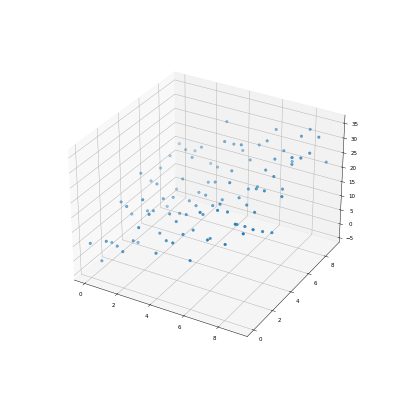

In [21]:
# Ground truth distribution
true_w = np.array([[3], [2], [1]])
noise_mean = 0
noise_variance = 5

# Generate training data
x_1, x_2 = np.meshgrid(np.arange(10), np.arange(10))
x = np.vstack((x_1.flatten(), x_2.flatten())).T
y = nd_ground_truth_distribution(x=x,
                                 w=true_w,
                                 noise_mean=noise_mean,
                                 noise_variance=noise_variance)

# Visualize the dataset
pprint([(list(input), output.item()) for input, output in zip(x, y)][:20])

fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [22]:
# The implementation previous actually already generalizes to multi-dimensional case!
# So we can simply use it to get our optimal parameters w*
w = find_optimal_parameters(x, y)
print(w)

[[2.79575567]
 [2.05889418]
 [1.06331705]]


<IPython.core.display.Javascript object>


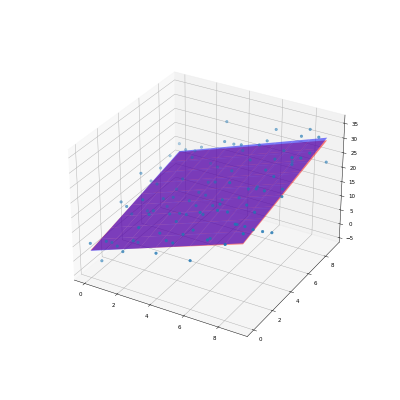

In [23]:
def visualize_3d(x, observed_y, trained_w, true_w, grid_shape=(10, 10)):
    """ This visualize the 3D curves """
    pad_x = np.hstack((np.ones((x.shape[0], 1)), x))
    trained_y = (pad_x @ trained_w).reshape(grid_shape)
    true_y = (pad_x @ true_w).reshape(grid_shape)
    
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], observed_y)
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)
    ax.plot_surface(x_1, x_2, trained_y, alpha=0.5, color="blue")
    ax.plot_surface(x_1, x_2, true_y, alpha=0.5, color="red")

    plt.show()

visualize_3d(x, y, w, true_w)

Again, the trained parameters are not the same as the ground truth parameters!  

# Classifier Comparision

In this tutorial, we will be looking at the decision boundaries of some classifiers:
- K Nearest Neighbour
- Decision Tree
- Naive Bayes
- Logistic Regression


In [4]:
import sys
!{sys.executable} -m pip install scikit-learn
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
num_classes = 2

classifiers = {
    "1 nearest neighbour": KNeighborsClassifier(1),
    "3 nearest neighbour": KNeighborsClassifier(3),
    "20 nearest neighbour": KNeighborsClassifier(20),
    "decision tree": DecisionTreeClassifier(),
    "naive bayes": GaussianNB(),
    "logistic regression": LogisticRegression(),
}

In [6]:
X, y = make_moons(n_samples=150, noise=0.2, random_state=0)
datasets = [(X, y)]

<IPython.core.display.Javascript object>


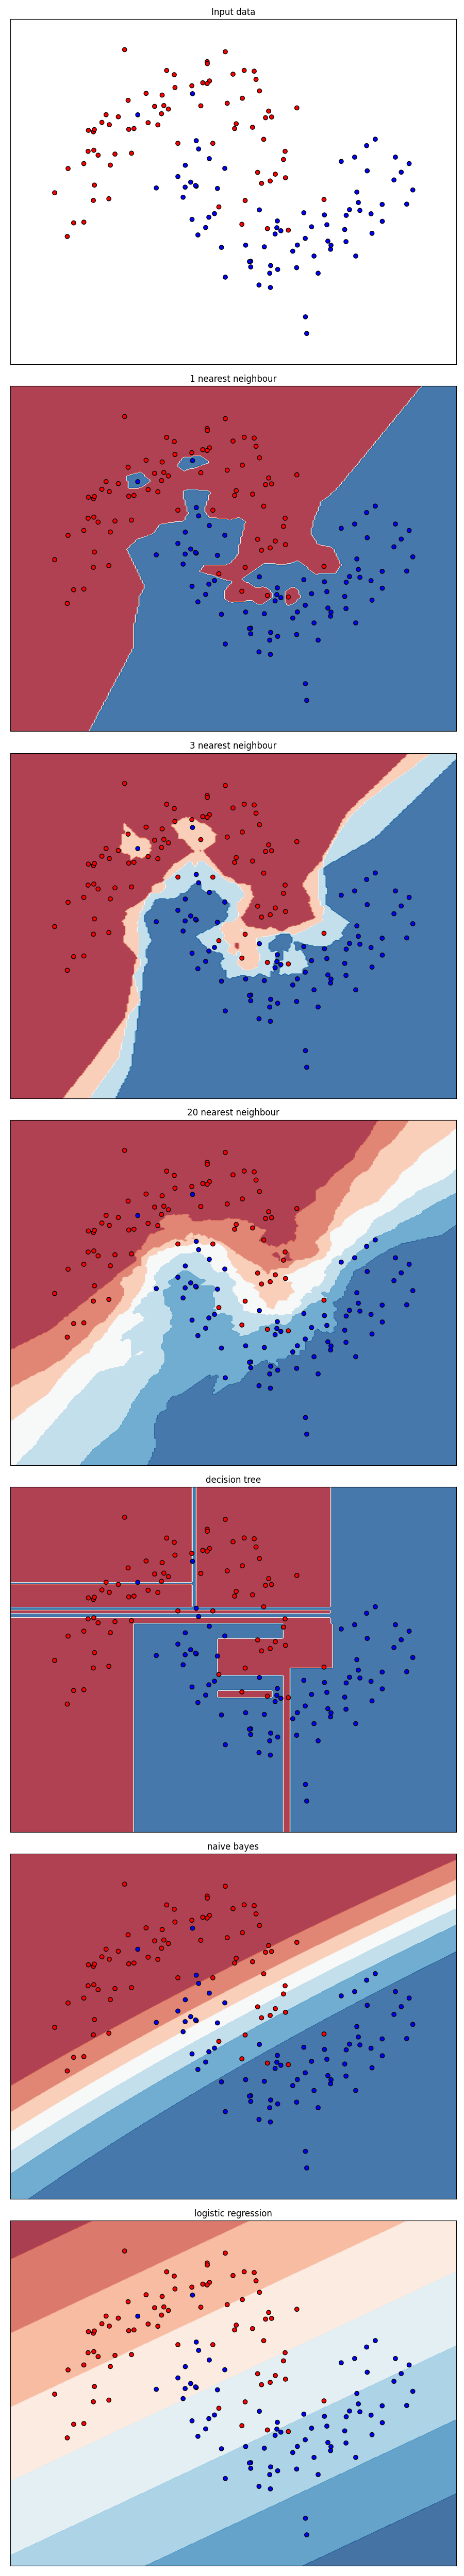

/home/moravejm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
fig = figure(figsize=(9, 50))
i = 1
h = .02
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(classifiers) + 1, len(datasets), i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in classifiers.items():
        ax = plt.subplot(len(classifiers) + 1, len(datasets), i)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
                   edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1

plt.tight_layout()
plt.show()

## Naive Bayes
Naive Bayes is a generative model (i.e. models the joint distribution $p(x, y)$). That means we can investigate the distribution of inputs conditioning on the class.


In [8]:
def gaussian_pdf_nd(x, mean, covariance):
    return (np.exp(-0.5 * (x - mean)[:, None, :] @ np.linalg.inv(covariance) @ (x - mean)[:, :, None] ) / (np.sqrt(((2 * np.pi) ** mean.size) * np.linalg.det(covariance)))).flatten()

def visualize_gaussian_3d(x, ys, means, covariances, grid_shape):
    """ This visualize the 3D curves """
    
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)
    
    for y, mean, covariance in zip(ys, means, covariances):
        ax.plot_surface(x_1, x_2, y.reshape(grid_shape), alpha=0.7, label="Mean: {} - covariance: {}".format(mean, covariance))

    plt.show()


<IPython.core.display.Javascript object>


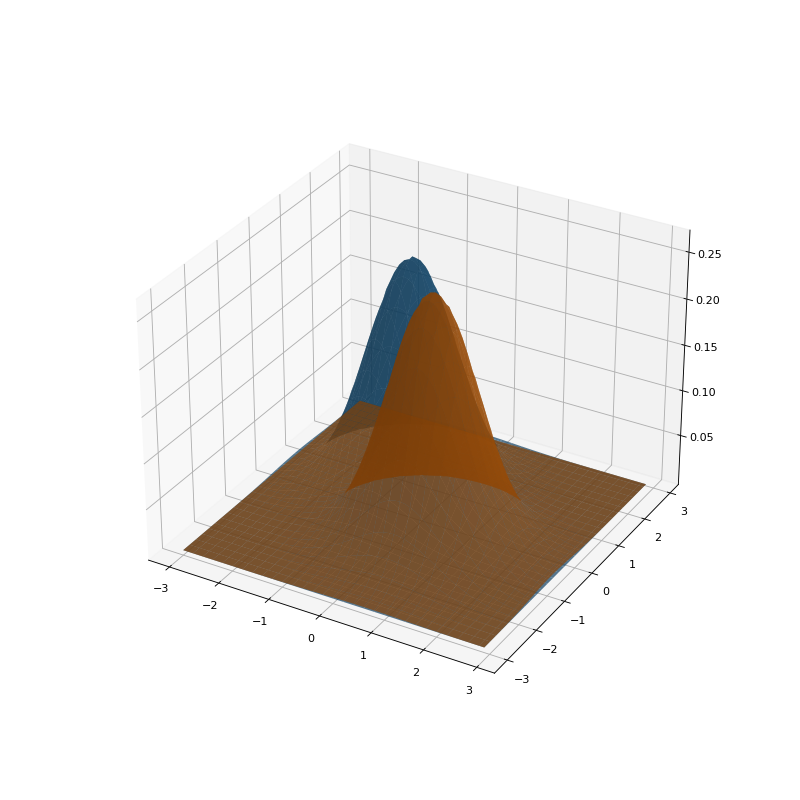

<IPython.core.display.Javascript object>


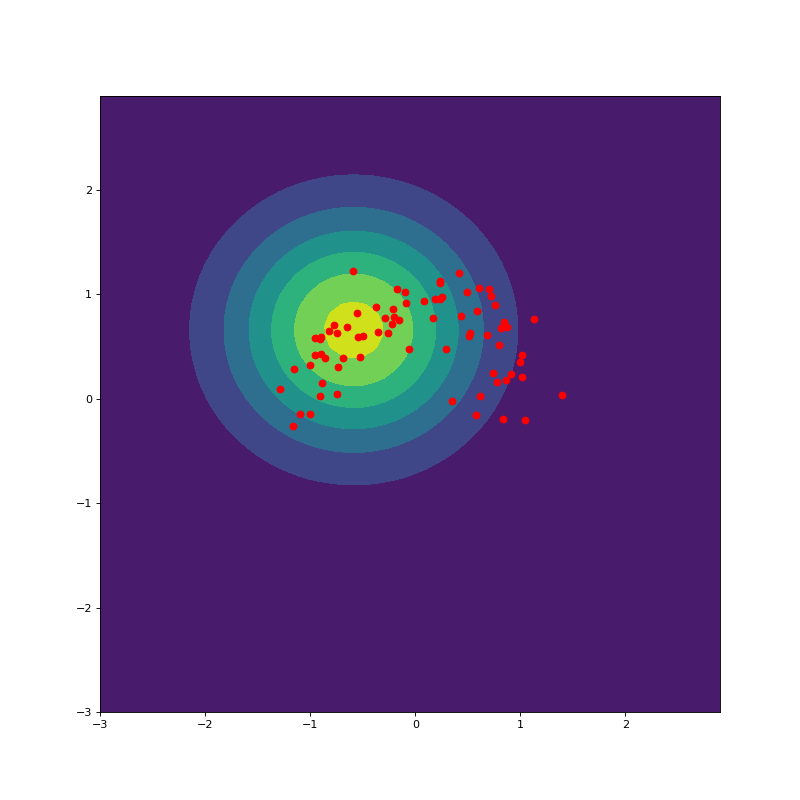

<IPython.core.display.Javascript object>


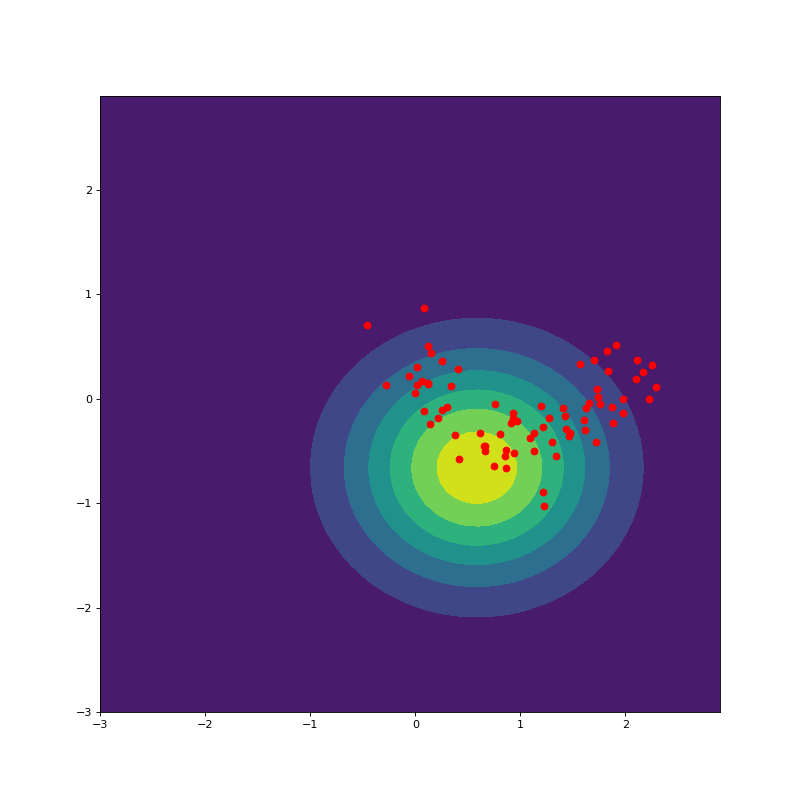

In [9]:
nb = classifiers["naive bayes"]
dataset = datasets[0]

x = np.mgrid[-3:3:0.1, -3:3:0.1]
grid_shape = x.shape[1:]
x = x.reshape((2, -1)).T

means = []
covariances = []
ys = []

for k in range(num_classes):
    means.append(nb.theta_[k])
    covariances.append(nb.sigma_[k])
    ys.append(gaussian_pdf_nd(x, means[-1], np.diag(covariances[-1])))

visualize_gaussian_3d(x, ys, means, covariances, grid_shape)


for class_i, y in enumerate(ys):
    fig = figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    x_1 = x[:, 0].reshape(grid_shape)
    x_2 = x[:, 1].reshape(grid_shape)
    
    ax.contourf(x_1, x_2, y.reshape(grid_shape))
    ax.scatter(dataset[0][dataset[1] == class_i, 0], dataset[0][dataset[1] == class_i, 1], c="red")
    plt.show()